In [70]:
%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [71]:
import lateral_signaling as lsig

In [72]:
import os

import numpy as np
import numba
import time
import tqdm

import shapely.geometry as geom
from scipy.spatial import Voronoi, voronoi_plot_2d
# from matplotlib.patches import Polygon
# from scipy.spatial.distance import cdist
from shapely.geometry import Polygon, Point
from descartes import PolygonPatch
from matplotlib import animation
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection, LineCollection

import matplotlib.pyplot as plt
%matplotlib inline
import colorcet as cc

In [73]:
import holoviews as hv
hv.extension("matplotlib")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [74]:
def get_rhs(Adj, sender_idx, func):
    def rhs(S, S_delay, *args):
        return func(S, S_delay, Adj, sender_idx, *args)
    return rhs

In [75]:
@numba.njit
def get_ell(rho):
    """Returns length of cel-cell contacts (hexagon side length) given cell density `rho`. """
    return np.sqrt(2 / (3 * np.sqrt(3) * rho))

In [76]:
def A_cells_um(nc, rho, A_c_rho1=800):
    """
    Returns the area of `nc` cells at density `rho` in 
    micrometers^2.
    `A_c_rho1` is the area of each cell in micrometers^2
    at a density of rho=1.
    """
    return nc * A_c_rho1 / rho

In [77]:
# Cell-cell distance when rho = 1
r0 = np.sqrt(3) * get_ell(rho = 1)

# Contact length when rho = 1
ell0 = r0 / np.sqrt(3)

# Perimeter when rho = 1
P0 = 6 * r0 / np.sqrt(3)

In [78]:
@numba.njit
def rho_t(t, rho_0, rho_max):
    """Returns density at time(s) `t` under logistic assumption."""
    return rho_max * rho_0 * np.exp(t) / (rho_max + rho_0 * (np.exp(t) - 1))

<hr>

I define a dimensionless variable to represent density

\begin{align}
\rho = \frac{\text{cell density (mm}^{-2}\text{)}}{\text{cell density at 100% confluence}} = \frac{\text{cell density (mm}^{-2}\text{)}}{1250 \text{ mm}^{-2}}
\end{align}


### Model 3: Changing degradation-dilution rate

\begin{align}
\frac{\mathrm{d}\, s}{\mathrm{d} t} &= \lambda + \alpha \frac{\left(\overline{s}_{(\tilde{t} - \tau)}\right)^p}{g^{2p} k^p + \left(\delta \, s_{(\tilde{t} - \tau)}\right)^p + \left(\overline{s}_{(\tilde{t} - \tau)}\right)^p} - g s
\end{align}

In [79]:
def get_rhs(Adj, sender_idx, func):
    """Given the indices of sender cells, returns a 
    function `rhs` with call signature 
    rhs(S, S_delay, *args) that can be passed to 
    `lsig.integrate_DDE` and `lsig.integrate_DDE_varargs`.
    """

    def rhs(S, S_delay, *args):
        return func(S, S_delay, Adj, sender_idx, *args)

    return rhs

In [80]:
def tc_rhs_3a(S, S_delay, Adj, sender_idx, lambda_, alpha, k, p, rho, delta, g):
    """
    Right-hand side of the transciever circuit delay 
    differential equation with growth rate `g`
    """

    # Set perimeter at density = 1
    ell = get_ell(rho)

    # Get input signal conc. across each interface
    S_bar = ell * Adj @ S_delay / P0

    # Calculate dE/dt
    dS_dt = (
        lambda_
        + alpha
        * (S_bar ** p)
        / (
            ((g ** 2) * k) ** p 
            + (delta * S_delay) ** p 
            + S_bar ** p
        )
        - g * S
    )

    # Set sender cell to zero
    dS_dt[sender_idx] = 0

    return dS_dt

In [81]:
@numba.njit
def beta_rho_lin(rho, m=0.2):
    return m + 1 - m * rho

In [82]:
def tc_rhs_3b_lin(S, S_delay, Adj, sender_idx, lambda_, alpha, k, p, rho, delta, g):
    """
    Right-hand side of the transciever circuit delay 
    differential equation with growth rate `g`
    """

    # Get beta as a function of rho
    beta = beta_rho_lin(rho)
    
    # Get input signal across each interface
    S_bar = beta * (Adj @ S_delay / 6)

    # Calculate dE/dt
    dS_dt = (
        lambda_
        + alpha
        * (S_bar ** p)
        / (
            ((g ** 2) * k) ** p 
            + (delta * S_delay) ** p 
            + S_bar ** p
        )
        - g * S
    )

    # Set sender cell to zero
    dS_dt[sender_idx] = 0

    return dS_dt

In [83]:
@numba.njit
def beta_rho_exp(rho, m=0.4):
    return np.exp(-m * (rho - 1))

In [84]:
# @numba.njit
def tc_rhs_3b_exp(S, S_delay, Adj, sender_idx, lambda_, alpha, k, p, rho, delta, g):
    """
    """
    
    # Get beta as a function of rho
    beta = beta_rho_exp(rho)
    
    # Get input signal across each interface
    S_bar = beta * (Adj @ S_delay / 6)

    # Calculate dE/dt
    dS_dt = (
        lambda_
        + alpha
        * (S_bar ** p)
        / (
            ((g ** 2) * k) ** p 
            + (delta * S_delay) ** p 
            + S_bar ** p
        )
        - g * S
    )

    # Set sender cell to zero
    dS_dt[sender_idx] = 0

    return dS_dt

<hr>

In [85]:
# Make square lattice
rows = cols = 150
X, Adj = lsig.hex_Adj(rows, cols, r=r0, sparse=True)

# Get # cells
n = X.shape[0]

In [86]:
# Assign sender(s)
# Specify percent of population that is sender
pct_s = 1
n_s = int(n * (pct_s/100)) + 1

# Set seed
np.random.seed(5)

# Assign senders randomly
sender_idx = np.random.choice(n, n_s, replace=False)

# sender_idx = lsig.get_center_cells(X, 1)

In [87]:
# Get initial conditions
S0 = np.zeros(n)
S0[sender_idx] = 1

In [88]:
# Set time parameters
tmax = 5
nt_t = 100
nt = int(nt_t * tmax) + 1
t = np.linspace(0, tmax, nt)

In [89]:
# Set signaling parameters
lambda_ = 1e-5
alpha = 3
k = 0.12
p = 2
delta = 3

# Set delay
delay = 0.4

<hr>

In [90]:
rhs3a = get_rhs(Adj, sender_idx, tc_rhs_3a)
rhs3blin = get_rhs(Adj, sender_idx, tc_rhs_3b_lin)
rhs3bexp = get_rhs(Adj, sender_idx, tc_rhs_3b_exp)

<hr>

In [91]:
# Set parameters for each drug condition
drug_params = [
    #  g  rho_0  rho_max
    (  1,     1,       4),  # drug-free
    (3/2,     1,       4),  # FGF2
    (  1,     1,       2),  # Ri
]

<hr>

In [92]:
# Initialize results vectors
rho_drug_t = np.empty((3, nt), dtype=np.float32)
ell_drug_t = np.empty((3, nt, n), dtype=np.float32)
X_drug_t = np.empty((3, nt, n, 2), dtype=np.float32)
S_drug_t3a = np.empty((3, nt, n), dtype=np.float32)

for i in range(3):

    # Get parameters
    g, rho_0, rho_max = drug_params[i]
    
    # Calculate density and contact length
    rho_t = lsig.logistic(t, g, rho_0, rho_max)
    r_t = 1/np.sqrt(rho_t)
    ell_t = r_t / np.sqrt(3)

    # Get cell positions
    X_t = np.empty((nt, n, 2))
    X_t[:, :, 0] = np.outer(r_t, X[:, 0])
    X_t[:, :, 1] = np.outer(r_t, X[:, 1])
    
    # Package parameters
    args = (lambda_, alpha, k, p, rho_0, delta, g)
    
    # Simulate
    S_t = lsig.integrate_DDE_varargs(
        t,
        rhs3a,
        var_vals=rho_t,
        where_vars=4,
        dde_args=args,
        E0=S0,
        delay=delay,
        min_delay=5,
    )
    
    # Save results
    rho_drug_t[i] = rho_t
    ell_drug_t[i] = np.outer(ell_t, np.ones(n))
    X_drug_t[i] = X_t
    S_drug_t3a[i] = S_t

In [93]:
# Calculate area of activated cells
S_act_t = S_drug_t3a > k
S_act_num = S_act_t.sum(axis=2)
A_act_drug = np.array([A_cells_um(S_act_num[i], rho_drug_t[i]) for i in range(3)])

:Overlay
   .Curve.Drug_hyphen_minus_free :Curve   [x]   (y)
   .Curve.FGF2                   :Curve   [x]   (y)
   .Curve.Ri                     :Curve   [x]   (y)
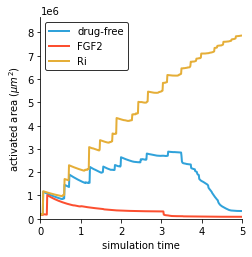

In [94]:
%%capture --no-display

p3a_plots = [
        hv.Curve(
            data = (t, A_act_drug[i]),
            label = ("drug-free", "FGF2", "Ri")[i],
        ).opts(
            xlabel = r"simulation time",
            xlim = (0, None),
            ylabel = r"activated area ($\mu m^2$)",
            ylim = (0, None),
        )
        for i in range(3)
    ]

p3a = hv.Overlay(p3a_plots)

p3a

In [95]:
# Initialize results vectors
rho_drug_t = np.empty((3, nt), dtype=np.float32)
ell_drug_t = np.empty((3, nt, n), dtype=np.float32)
X_drug_t = np.empty((3, nt, n, 2), dtype=np.float32)
S_drug_t3blin = np.empty((3, nt, n), dtype=np.float32)

for i in range(3):

    # Get parameters
    g, rho_0, rho_max = drug_params[i]
    
    # Calculate density and contact length
    rho_t = lsig.logistic(t, g, rho_0, rho_max)
    r_t = 1/np.sqrt(rho_t)
    ell_t = r_t / np.sqrt(3)

    # Get cell positions
    X_t = np.empty((nt, n, 2))
    X_t[:, :, 0] = np.outer(r_t, X[:, 0])
    X_t[:, :, 1] = np.outer(r_t, X[:, 1])
    
    # Package parameters
    args = (lambda_, alpha, k, p, rho_0, delta, g)
    
    # Simulate
    S_t = lsig.integrate_DDE_varargs(
        t,
        rhs3blin,
        var_vals=rho_t,
        where_vars=4,
        dde_args=args,
        E0=S0,
        delay=delay,
        min_delay=5,
    )
    
    # Save results
    rho_drug_t[i] = rho_t
    ell_drug_t[i] = np.outer(ell_t, np.ones(n))
    X_drug_t[i] = X_t
    S_drug_t3blin[i] = S_t

In [96]:
# Calculate area of activated cells
S_act_t = S_drug_t3blin > k
S_act_num = S_act_t.sum(axis=2)
A_act_drug = np.array([A_cells_um(S_act_num[i], rho_drug_t[i]) for i in range(3)])

:Overlay
   .Curve.Drug_hyphen_minus_free :Curve   [x]   (y)
   .Curve.FGF2                   :Curve   [x]   (y)
   .Curve.Ri                     :Curve   [x]   (y)
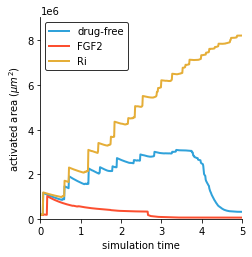

In [97]:
%%capture --no-display

p3blin_plots = [
        hv.Curve(
            data = (t, A_act_drug[i]),
            label = ("drug-free", "FGF2", "Ri")[i],
        ).opts(
            xlabel = r"simulation time",
            xlim = (0, None),
            ylabel = r"activated area ($\mu m^2$)",
            ylim = (0, None),
        )
        for i in range(3)
    ]
p3blin = hv.Overlay(p3blin_plots)

p3blin

In [98]:
# Initialize results vectors
rho_drug_t = np.empty((3, nt), dtype=np.float32)
ell_drug_t = np.empty((3, nt, n), dtype=np.float32)
X_drug_t = np.empty((3, nt, n, 2), dtype=np.float32)
S_drug_t3bexp = np.empty((3, nt, n), dtype=np.float32)

for i in range(3):

    # Get parameters
    g, rho_0, rho_max = drug_params[i]
    
    # Calculate density and contact length
    rho_t = lsig.logistic(t, g, rho_0, rho_max)
    r_t = 1/np.sqrt(rho_t)
    ell_t = r_t / np.sqrt(3)

    # Get cell positions
    X_t = np.empty((nt, n, 2))
    X_t[:, :, 0] = np.outer(r_t, X[:, 0])
    X_t[:, :, 1] = np.outer(r_t, X[:, 1])
    
    # Package parameters
    args = (lambda_, alpha, k, p, rho_0, delta, g)
    
    # Simulate
    S_t = lsig.integrate_DDE_varargs(
        t,
        rhs3bexp,
        var_vals=rho_t,
        where_vars=4,
        dde_args=args,
        E0=S0,
        delay=delay,
        min_delay=5,
    )
    
    # Save results
    rho_drug_t[i] = rho_t
    ell_drug_t[i] = np.outer(ell_t, np.ones(n))
    X_drug_t[i] = X_t
    S_drug_t3bexp[i] = S_t

In [99]:
# Calculate area of activated cells
S_act_t = S_drug_t3bexp > k
S_act_num = S_act_t.sum(axis=2)
A_act_drug = np.array([A_cells_um(S_act_num[i], rho_drug_t[i]) for i in range(3)])

:Overlay
   .Curve.Drug_hyphen_minus_free :Curve   [x]   (y)
   .Curve.FGF2                   :Curve   [x]   (y)
   .Curve.Ri                     :Curve   [x]   (y)
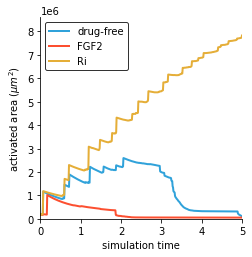

In [100]:
%%capture --no-display

p3bexp_plots = [
        hv.Curve(
            data = (t, A_act_drug[i]),
            label = ("drug-free", "FGF2", "Ri")[i],
        ).opts(
            xlabel = r"simulation time",
            xlim = (0, None),
            ylabel = r"activated area ($\mu m^2$)",
            ylim = (0, None),
        )
        for i in range(3)
    ]

p3bexp = hv.Overlay(p3bexp_plots)

p3bexp

:Layout
   .Overlay.Drug_hyphen_minus_free :Overlay
      .Curve.Geometric_model                                                                         :Curve   [x]   (y)
      .Curve.Reverse_over_beta_left_parenthesis_reverse_over_rho_right_parenthesis_comma_linear      :Curve   [x]   (y)
      .Curve.Reverse_over_beta_left_parenthesis_reverse_over_rho_right_parenthesis_comma_exponential :Curve   [x]   (y)
   .Overlay.FGF2                   :Overlay
      .Curve.Geometric_model                                                                         :Curve   [x]   (y)
      .Curve.Reverse_over_beta_left_parenthesis_reverse_over_rho_right_parenthesis_comma_linear      :Curve   [x]   (y)
      .Curve.Reverse_over_beta_left_parenthesis_reverse_over_rho_right_parenthesis_comma_exponential :Curve   [x]   (y)
   .Overlay.ROCK_hyphen_minus_i    :Overlay
      .Curve.Geometric_model                                                                         :Curve   [x]   (y)
      .Curve.Reverse_over_beta_left_parenthesis_reverse_over_rho_right_parenthesis_comma_linear      :Curve   [x]   (y)
      .Curve.Reverse_over_beta_left_parenthesis_reverse_over_rho_right_parenthesis_comma_exponential :Curve   [x]   (y)
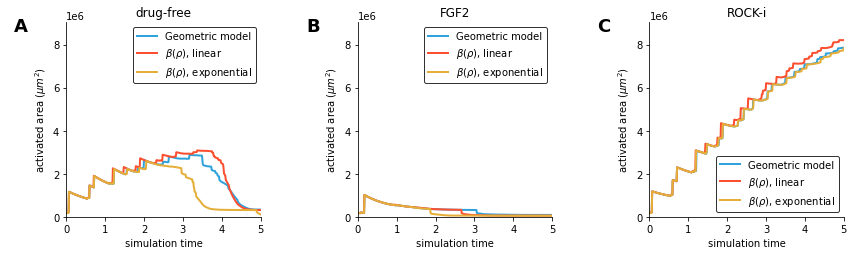

In [101]:
%%capture --no-display

hv.Layout([
    hv.Overlay([
        p3a_plots[i].relabel("Geometric model"), 
        p3blin_plots[i].relabel(r"$\beta(\rho)$, linear"), 
        p3bexp_plots[i].relabel(r"$\beta(\rho)$, exponential"), 
    ]).relabel(("drug-free", "FGF2", "ROCK-i")[i]) 
    for i in range(3) 
])

<hr>

## Save videos

In [102]:
zoom = 1.1
xlim = zoom * X[:, 0].min(), zoom * X[:, 0].max()
ylim = zoom * X[:, 1].min(), zoom * X[:, 1].max()

# xlim = zoom * np.array([X[:, 0].min(), X[:, 0].max()])
# ylim = zoom * np.array([X[:, 1].min(), X[:, 1].max()])

### Geometric

In [115]:
# Set directory
dir_name = "plots"

# Set filenames
vid3a_fnames = (
    "geometric_model_untreated_prop",
    "geometric_model_FGF2_prop",
    "geometric_model_ROCKi_prop",
)

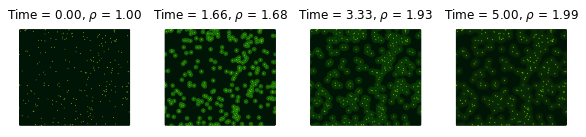

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set dimensions for a grid of frames
nrows, ncols = 1, 4

drug = 0

# Render frames
nplot = nrows * ncols
idx = [int(i) for i in np.linspace(0, nt-1, nplot)]
fig2, axs2 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,6))
for ax, i in zip(axs2.flat, idx):
    title=f"Time = {t[i]:.2f}, " + r"$\rho$ = " + f"{rho_t[i]:.2f}"
    lsig.inspect_colormesh(
        ax=ax,
        X=X_drug_t[drug],
        rows=rows,
        cols=cols,
#         cell_radii=ell_drug_t[drug],
        var=S_drug_t3a[drug], 
        idx=i,
        vmin=0, 
        vmax=1, 
        cmap="kgy",
        xlim=xlim,
        ylim=ylim,
        title=title,
#         plot_ifc=False,
        axis_off=True,
    )

Writing to: plots\geometric_model_untreated_prop


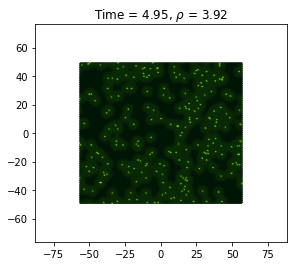

In [120]:
drug = 0

title_fun = lambda i: f"Time = {t[i]:.2f}, " + r"$\rho$" + f" = {rho_drug_t[drug, i]:.2f}"

lsig.animate_colormesh(
    X_arr=X_t,
#     cell_radii=ell_t_arr,
#     var=S_t,
#     ifcc=cc.CET_L8[110],
#     lcoll_kwargs=dict(linewidth=0.5),
    rows=rows,
    cols=cols,
    var_t=S_drug_t3a[drug],
    n_frames=100,
    file_name=vid3a_fnames[drug],
    dir_name=dir_name,
    fps=15, 
    vmin=0, 
    vmax=1, 
    cmap="kgy",
    title_fun=title_fun,
    xlim=xlim,
    ylim=ylim,
    axis_off=False,
)

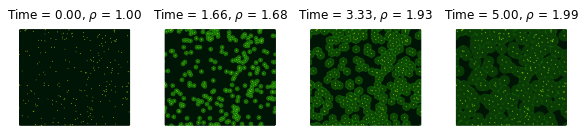

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set dimensions for a grid of frames
nrows, ncols = 1, 4

drug = 2

# Render frames
nplot = nrows * ncols
idx = [int(i) for i in np.linspace(0, nt-1, nplot)]
fig2, axs2 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,6))
for ax, i in zip(axs2.flat, idx):
    title=f"Time = {t[i]:.2f}, " + r"$\rho$ = " + f"{rho_t[i]:.2f}"
    lsig.inspect_colormesh(
        ax=ax,
        X=X_drug_t[drug, 0],
        rows=rows,
        cols=cols,
#         cell_radii=ell_drug_t[drug],
        var=S_drug_t3a[drug], 
        idx=i,
        vmin=0, 
        vmax=1, 
        cmap="kgy",
        xlim=xlim,
        ylim=ylim,
        title=title,
#         plot_ifc=False,
        axis_off=True,
    )

Writing to: plots\geometric_model_ROCKi_prop


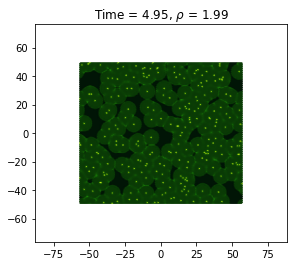

In [121]:
drug = 2

title_fun = lambda i: f"Time = {t[i]:.2f}, " + r"$\rho$" + f" = {rho_drug_t[drug, i]:.2f}"

lsig.animate_colormesh(
    X_arr=X_t,
#     cell_radii=ell_t_arr,
#     var=S_t,
#     ifcc=cc.CET_L8[110],
#     lcoll_kwargs=dict(linewidth=0.5),
    rows=rows,
    cols=cols,
    var_t=S_drug_t3a[drug],
    n_frames=100,
    file_name=vid3a_fnames[drug],
    dir_name=dir_name,
    fps=15, 
    vmin=0, 
    vmax=1, 
    cmap="kgy",
    title_fun=title_fun,
    xlim=xlim,
    ylim=ylim,
    axis_off=False,
)

### Linear

In [124]:
# Set filenames
vid3blin_fnames = (
    "linear_model_untreated_prop",
    "linear_model_FGF2_prop",
    "linear_model_ROCKi_prop",
)

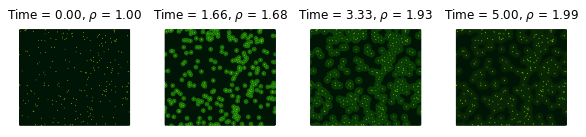

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set dimensions for a grid of frames
nrows, ncols = 1, 4

drug = 0

# Render frames
nplot = nrows * ncols
idx = [int(i) for i in np.linspace(0, nt-1, nplot)]
fig2, axs2 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,6))
for ax, i in zip(axs2.flat, idx):
    title=f"Time = {t[i]:.2f}, " + r"$\rho$ = " + f"{rho_t[i]:.2f}"
    lsig.inspect_colormesh(
        ax=ax,
        X=X_drug_t[drug, 0],
        rows=rows,
        cols=cols,
#         cell_radii=ell_drug_t[drug],
        var=S_drug_t3blin[drug], 
        idx=i,
        vmin=0, 
        vmax=1, 
        cmap="kgy",
        xlim=xlim,
        ylim=ylim,
        title=title,
#         plot_ifc=False,
        axis_off=True,
    )

Writing to: plots\linear_model_untreated_prop


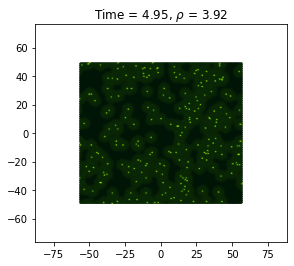

In [126]:
drug = 0

title_fun = lambda i: f"Time = {t[i]:.2f}, " + r"$\rho$" + f" = {rho_drug_t[drug, i]:.2f}"

lsig.animate_colormesh(
    X_arr=X_t,
#     cell_radii=ell_t_arr,
#     var=S_t,
#     ifcc=cc.CET_L8[110],
#     lcoll_kwargs=dict(linewidth=0.5),
    rows=rows,
    cols=cols,
    var_t=S_drug_t3blin[drug],
    n_frames=100,
    file_name=vid3blin_fnames[drug],
    dir_name=dir_name,
    fps=15, 
    vmin=0, 
    vmax=1, 
    cmap="kgy",
    title_fun=title_fun,
    xlim=xlim,
    ylim=ylim,
    axis_off=False,
)

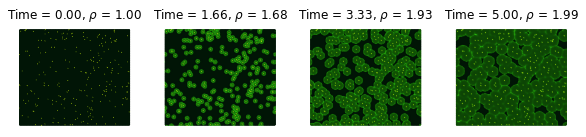

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set dimensions for a grid of frames
nrows, ncols = 1, 4

drug = 2

# Render frames
nplot = nrows * ncols
idx = [int(i) for i in np.linspace(0, nt-1, nplot)]
fig2, axs2 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,6))
for ax, i in zip(axs2.flat, idx):
    title=f"Time = {t[i]:.2f}, " + r"$\rho$ = " + f"{rho_t[i]:.2f}"
    lsig.inspect_colormesh(
        ax=ax,
        X=X_drug_t[drug, 0],
        rows=rows,
        cols=cols,
#         cell_radii=ell_drug_t[drug],
        var=S_drug_t3blin[drug], 
        idx=i,
        vmin=0, 
        vmax=1, 
        cmap="kgy",
        xlim=xlim,
        ylim=ylim,
        title=title,
#         plot_ifc=False,
        axis_off=True,
    )

Writing to: plots\linear_model_ROCKi_prop


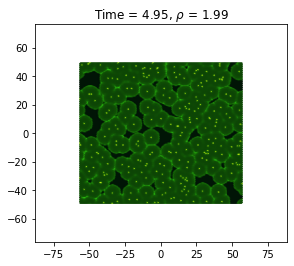

In [128]:
drug = 2

title_fun = lambda i: f"Time = {t[i]:.2f}, " + r"$\rho$" + f" = {rho_drug_t[drug, i]:.2f}"

lsig.animate_colormesh(
    X_arr=X_t,
#     cell_radii=ell_t_arr,
#     var=S_t,
#     ifcc=cc.CET_L8[110],
#     lcoll_kwargs=dict(linewidth=0.5),
    rows=rows,
    cols=cols,
    var_t=S_drug_t3blin[drug],
    n_frames=100,
    file_name=vid3blin_fnames[drug],
    dir_name=dir_name,
    fps=15, 
    vmin=0, 
    vmax=1, 
    cmap="kgy",
    title_fun=title_fun,
    xlim=xlim,
    ylim=ylim,
    axis_off=False,
)

### Exponential

In [137]:
# Set filenames
vid3bexp_fnames = (
    "exponential_model_untreated_prop",
    "exponential_model_FGF2_prop",
    "exponential_model_ROCKi_prop",
)

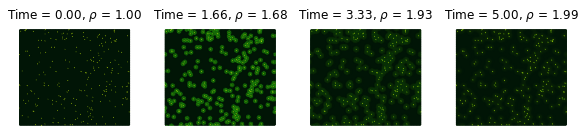

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set dimensions for a grid of frames
nrows, ncols = 1, 4

drug = 0

# Render frames
nplot = nrows * ncols
idx = [int(i) for i in np.linspace(0, nt-1, nplot)]
fig2, axs2 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,6))
for ax, i in zip(axs2.flat, idx):
    title=f"Time = {t[i]:.2f}, " + r"$\rho$ = " + f"{rho_t[i]:.2f}"
    lsig.inspect_colormesh(
        ax=ax,
        X=X_drug_t[drug, 0],
        rows=rows,
        cols=cols,
#         cell_radii=ell_drug_t[drug],
        var=S_drug_t3bexp[drug], 
        idx=i,
        vmin=0, 
        vmax=1, 
        cmap="kgy",
        xlim=xlim,
        ylim=ylim,
        title=title,
#         plot_ifc=False,
        axis_off=True,
    )

Writing to: plots\exponential_model_untreated_prop


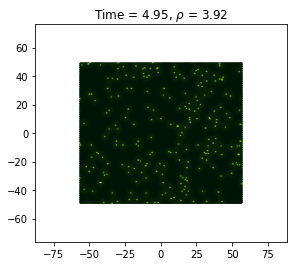

In [139]:
drug = 0

title_fun = lambda i: f"Time = {t[i]:.2f}, " + r"$\rho$" + f" = {rho_drug_t[drug, i]:.2f}"

lsig.animate_colormesh(
    X_arr=X_t,
#     cell_radii=ell_t_arr,
#     var=S_t,
#     ifcc=cc.CET_L8[110],
#     lcoll_kwargs=dict(linewidth=0.5),
    rows=rows,
    cols=cols,
    var_t=S_drug_t3bexp[drug],
    n_frames=100,
    file_name=vid3bexp_fnames[drug],
    dir_name=dir_name,
    fps=15, 
    vmin=0, 
    vmax=1, 
    cmap="kgy",
    title_fun=title_fun,
    xlim=xlim,
    ylim=ylim,
    axis_off=False,
)

Writing to: plots\exponential_model_ROCKi_prop


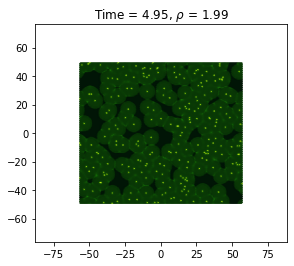

In [135]:
drug = 2

title_fun = lambda i: f"Time = {t[i]:.2f}, " + r"$\rho$" + f" = {rho_drug_t[drug, i]:.2f}"

lsig.animate_colormesh(
    X_arr=X_t,
#     cell_radii=ell_t_arr,
#     var=S_t,
#     ifcc=cc.CET_L8[110],
#     lcoll_kwargs=dict(linewidth=0.5),
    rows=rows,
    cols=cols,
    var_t=S_drug_t3bexp[drug],
    n_frames=100,
    file_name=vid3bexp_fnames[drug],
    dir_name=dir_name,
    fps=15, 
    vmin=0, 
    vmax=1, 
    cmap="kgy",
    title_fun=title_fun,
    xlim=xlim,
    ylim=ylim,
    axis_off=False,
)

Writing to: plots\exponential_model_ROCKi_prop


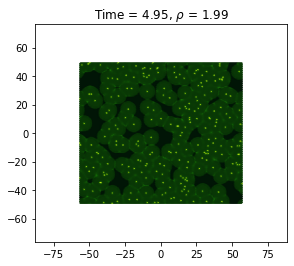

In [136]:
drug = 2

title_fun = lambda i: f"Time = {t[i]:.2f}, " + r"$\rho$" + f" = {rho_drug_t[drug, i]:.2f}"

lsig.animate_colormesh(
    X_arr=X_t,
#     cell_radii=ell_t_arr,
#     var=S_t,
#     ifcc=cc.CET_L8[110],
#     lcoll_kwargs=dict(linewidth=0.5),
    rows=rows,
    cols=cols,
    var_t=S_drug_t3bexp[drug],
    n_frames=100,
    file_name=vid3bexp_fnames[drug],
    dir_name=dir_name,
    fps=15, 
    vmin=0, 
    vmax=1, 
    cmap="kgy",
    title_fun=title_fun,
    xlim=xlim,
    ylim=ylim,
    axis_off=False,
)